<a href="https://colab.research.google.com/github/dcabarcase/Vision-Artificial/blob/main/AvanceProyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install img2pdf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 KB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 19.6 MB/s eta 0:00:00
  Created wheel for img2pdf: filename=img2pdf-0.4.4-py3-none-any.whl size=44876 sha256=ef7f441012faed68c4e9d53bb48459f3d2cf239d369436d05db2f9cc42631576
  Stored in directory: /root/.cache/pip/wheels/9e/70/4e/193fef3784ff9e9e7c8a3a54e9b580441a4137f3fa4bbb76cd
Successfully built img2pdf
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0


In [ ]:
import numpy as np
import cv2 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
import urllib.request
import numpy as np
from PIL import Image 
import urllib.request
import img2pdf
import tempfile

In [ ]:
#@title
#Filtros 
def distance(point1,point2):
    return np.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)
def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = np.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base
def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - np.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

In [ ]:
IMAGE_URL = 'https://github.com/dcabarcase/Vision-Artificial/blob/main/avcc3.jpeg?raw=true'
im = io.imread(IMAGE_URL) 
def filtrado_inicial(im):
    imgray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY) #Poner la imagen en escala de grises
    imfil = cv2.GaussianBlur(imgray, (5,5), 0) #filtro Gaussiano para suavizar la imagen y reducir el ruido 
    return imfil

In [ ]:
def ver_filtro():
    imfil = filtrado_inicial(im)
    cv2_imshow(imfil)

In [ ]:
def rotacion(imfil):
    imrot = cv2.rotate(imfil,cv2.ROTATE_90_COUNTERCLOCKWISE) #Desventaja: Solo rota en multiplos de 90° :p
    cv2_imshow(imrot)

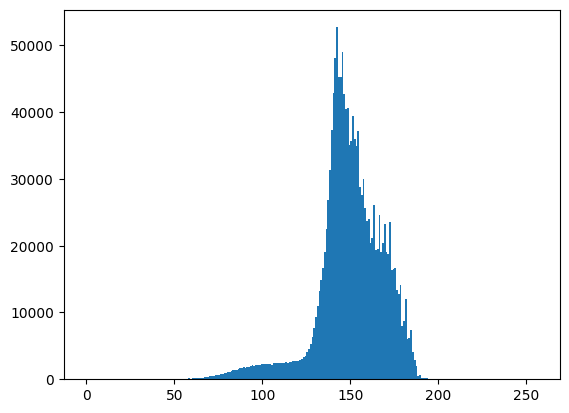

El valor máximo del histograma es: 142


In [ ]:
def calcular_histograma():
    imfil = filtrado_inicial(im)
    hist = plt.hist(imfil.ravel(), bins=256, range=[0,256])
    plt.show(hist)
    frecuencias = hist[0]
    bins = hist[1]
    valor_max = np.argmax(frecuencias)
    print("El valor máximo del histograma es:", valor_max)
calcular_histograma()

In [ ]:
def procesado_imagen():
    imfil=filtrado_inicial(im)
    #(T, threshImg) = cv2.threshold(imfil, 130, 255, cv2.THRESH_BINARY) #Manual
    #(T, threshImg) = cv2.threshold(imfil, 0, 255, cv2.THRESH_BINARY| cv2.THRESH_OTSU) #Metodo de OTSU
    imumbral = cv2.adaptiveThreshold(imfil, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2) #Metodo Gaussiano
    #imumbral = threshImg.copy()
    kernel = np.ones((1,1),np.uint8)
    erosion = cv2.erode(imumbral,kernel,iterations = 1)
    dilation = cv2.dilate(erosion,kernel,iterations = 2)   
    return dilation

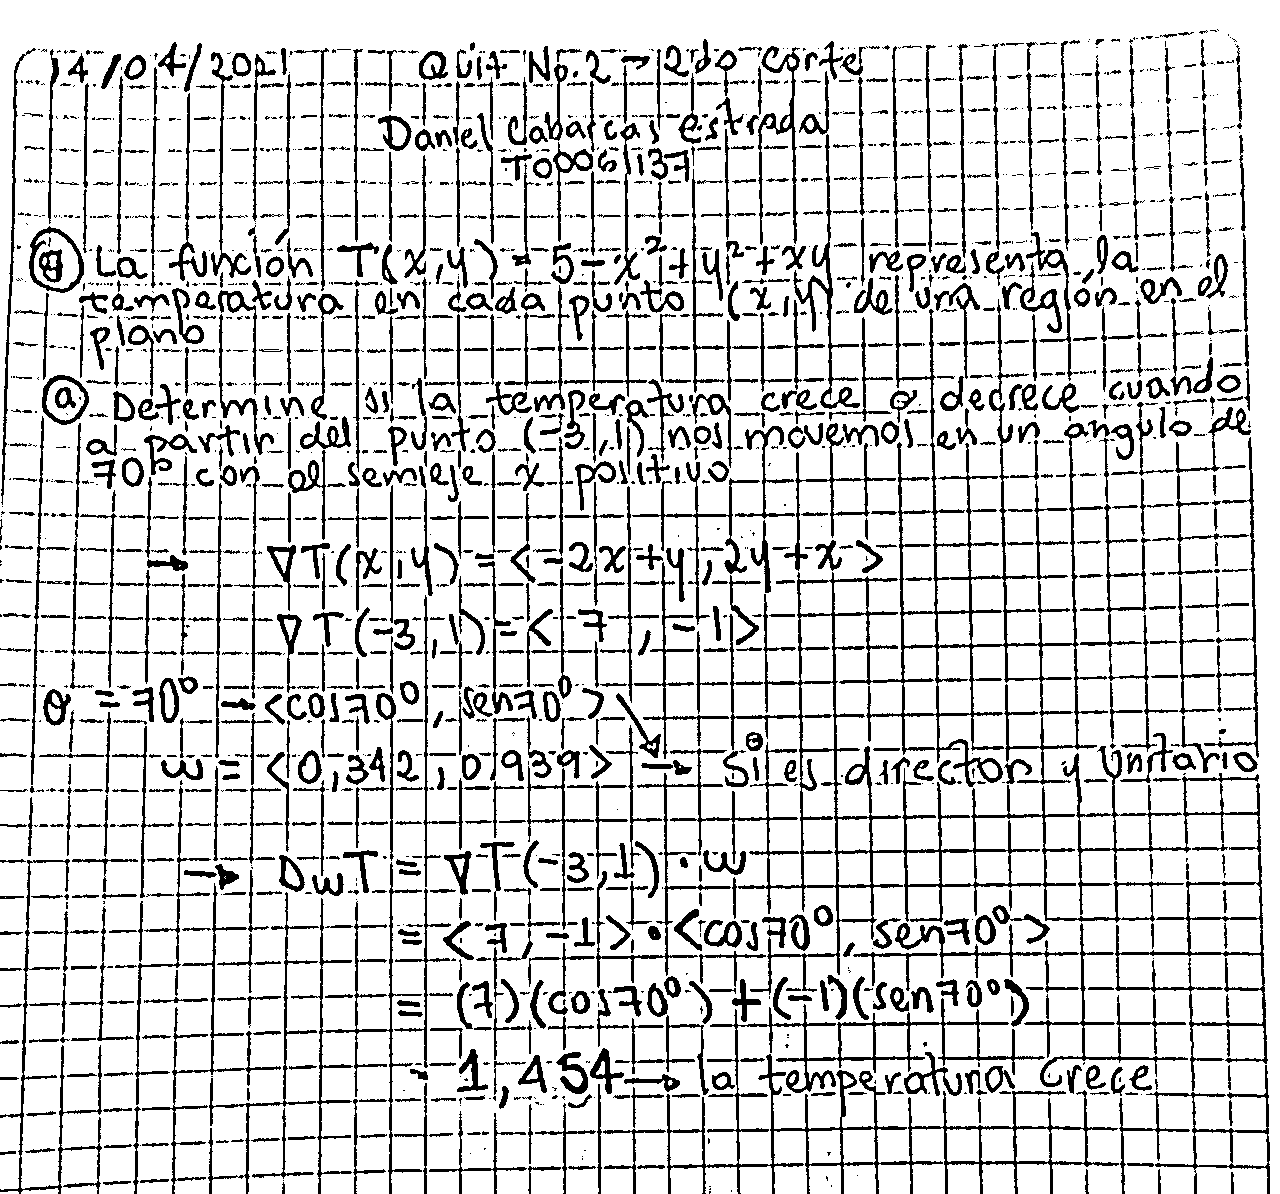

In [ ]:
def ver_imscan():
    dilation = procesado_imagen()
    cv2_imshow(dilation)
ver_imscan()

In [ ]:
def conver_pdf():
    #Impresión de PDF para la imagen escaneada
    dilation = procesado_imagen()
    imagen_pil = Image.fromarray(dilation)  # Convertir a formato PIL
    # Guardar la imagen en un archivo temporal en formato .jpg
    scan_jpg = 'Resultado.jpg'
    imagen_pil.save(scan_jpg, 'JPEG')
    # Convertir la imagen a formato pdf y guardarla en un archivo
    with open('Scaner.pdf', 'wb') as f:
        f.write(img2pdf.convert([scan_jpg], dpi=300))
conver_pdf()

Librería Img2pdf 

*  with open('salida.pdf', 'wb') as f:: Abre un archivo en modo de escritura 
binaria (wb) y crea un objeto de archivo f para manipularlo. El archivo se cierra automáticamente al salir del bloque with.

* f.write(img2pdf.convert([temp_filename], dpi=300)): Convierte la imagen especificada en temp_filename a formato PDF con una resolución de 300 DPI utilizando img2pdf, y escribe el resultado en el archivo f.

Tomado de: img2pdf. (2022, April 7). PyPI. https://pypi.org/project/img2pdf/

‌y 7. Input and Output. (2016). Python Documentation. https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files

‌
